In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data=pd.read_csv("air_passenger.csv")
dataset_train=data

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
data['Month'] = pd.to_datetime(data['Month'])
data.columns = ['Month','Passenger']
data.head()

,Month,Passenger
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
data.shape

(144, 2)

In [6]:
data.isnull().any()

Month        False
Passenger    False
dtype: bool

Line Plot

Text(0, 0.5, 'No. of Passengers')

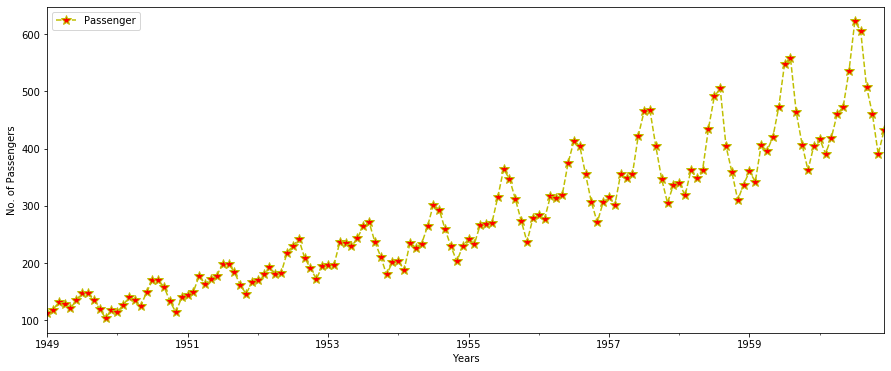

In [7]:
data.plot(x='Month',y='Passenger',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.xlabel('Years')
plt.ylabel('No. of Passengers')

Lag Plot

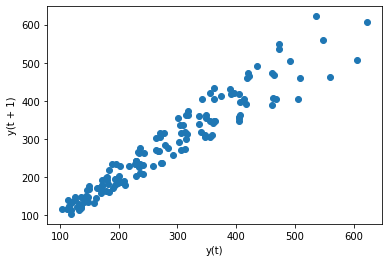

In [8]:
pd.plotting.lag_plot(data['Passenger'])

In [9]:
data['Month_name']=data['Month'].dt.month
data['Year']=data['Month'].dt.year
data.head()

,Month,Passenger,Month_name,Year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


Heatmap

(array([[21.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  4.,  6.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  3.,  5.,  3.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  5.,  4.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  6.,  1.,  2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  6.,  2.,  1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  3.,  6.,  7.,  3.,  3.,  2.]]),
 array([1949. , 1950.1, 1951.2, 1952.3, 1953.4, 1954.5, 1955.6, 1956.7,
        1957.8, 1958.9, 1960. ]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <matplotlib.collections.QuadMesh at 0x26c017d35c8>)

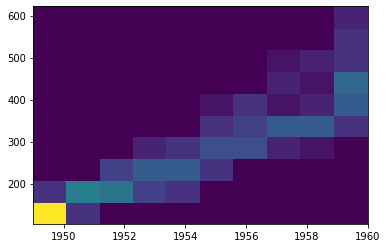

In [10]:
x=data['Year']
y=data['Passenger']
plt.hist2d(x, y)

Hexbin Plot

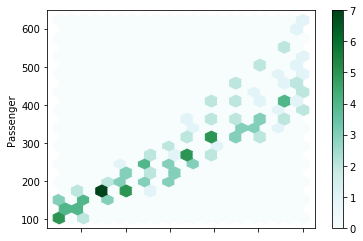

In [11]:
data.plot.hexbin(x='Year',y='Passenger',gridsize=20)

Boxplot

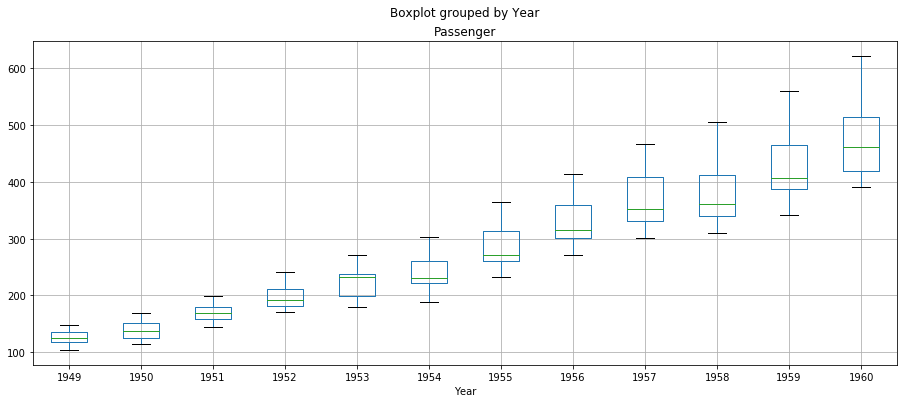

In [12]:
a=data.boxplot(figsize=(15,6),by='Year',column='Passenger')

In [123]:
train_set=dataset_train.iloc[:,1:2]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
#train_set=train_set.append({'#Passengers':121},ignore_index=True)
scaled_training=sc.fit_transform(train_set)

In [124]:
scaled_training

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [15]:
x_train=[]
y_train=[]

for i in range(142):
    x_train.append(scaled_training[i:i+1,0])
    y_train.append(scaled_training[i:(i+1),0])
    

x_train,y_train=np.array(x_train),np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
C:\Users\Goutham N\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Goutham N\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Goutham N\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Goutham N\anaconda3\lib\site-packages\tensorflow\python\fra

In [17]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
142/142 [==============================] - 1s 6ms/step - loss: 0.1093
Epoch 2/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 3/100
142/142 [==============================] - 0s 3ms/step - loss: 0.0332
Epoch 4/100
142/142 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 5/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 6/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 7/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 8/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 9/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 10/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 11/100
142/142 [==============================] - 0s 2ms/step - loss: 0.0

142/142 [==============================] - 0s 2ms/step - loss: 1.1604e-05
Epoch 79/100
142/142 [==============================] - 0s 2ms/step - loss: 1.2047e-05
Epoch 80/100
142/142 [==============================] - 0s 2ms/step - loss: 1.3436e-05
Epoch 81/100
142/142 [==============================] - 0s 2ms/step - loss: 1.1804e-05
Epoch 82/100
142/142 [==============================] - 0s 2ms/step - loss: 9.2289e-06
Epoch 83/100
142/142 [==============================] - 0s 2ms/step - loss: 9.6112e-06
Epoch 84/100
142/142 [==============================] - 0s 2ms/step - loss: 1.6758e-05
Epoch 85/100
142/142 [==============================] - 0s 2ms/step - loss: 1.1976e-05
Epoch 86/100
142/142 [==============================] - 0s 2ms/step - loss: 1.1128e-05
Epoch 87/100
142/142 [==============================] - 0s 2ms/step - loss: 1.0386e-05
Epoch 88/100
142/142 [==============================] - 0s 2ms/step - loss: 1.5541e-05
Epoch 89/100
142/142 [==============================] - 

In [18]:
model.save("passenger_predict.h5")

In [19]:
y_predict = model.predict(x_train)
y_predict = sc.inverse_transform(y_predict)
y_train = sc.inverse_transform(y_train)

In [20]:
y_predict

array([[116.28764],
       [121.77124],
       [134.71217],
       [131.92247],
       [124.5274 ],
       [137.51067],
       [149.73495],
       [149.73495],
       [138.4454 ],
       [122.6889 ],
       [109.03755],
       [121.77124],
       [119.0246 ],
       [129.1417 ],
       [143.13333],
       [137.51067],
       [128.21678],
       [150.68163],
       [170.754  ],
       [170.754  ],
       [159.24016],
       [135.64403],
       [118.1112 ],
       [142.19388],
       [146.9003 ],
       [151.62915],
       [178.49031],
       [164.02385],
       [172.68372],
       [178.49031],
       [199.00282],
       [199.00282],
       [184.32204],
       [163.0655 ],
       [147.84428],
       [166.9036 ],
       [171.71849],
       [180.43149],
       [193.11392],
       [181.4031 ],
       [183.34839],
       [217.78107],
       [229.72952],
       [241.73488],
       [208.86287],
       [191.15576],
       [172.68372],
       [194.09392],
       [196.05571],
       [196.05571],


In [21]:
y_train

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

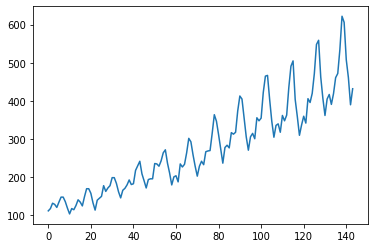

In [22]:
plt.plot(train_set)

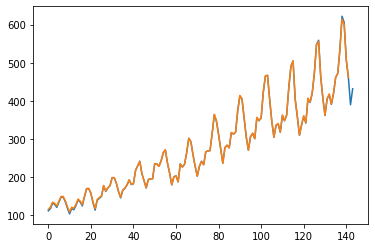

In [23]:
plt.plot(train_set)
plt.plot(y_predict)

In [24]:
#We observe that it has predicted correctly

In [121]:
#calculated percentage for pie chart
j=0
sum_2=0
while(j<12):
    sum=0
    i=j
    while(i<144):
        sum=sum+train_set.loc[i]
        i=i+12
    print((sum/40363)*100)
    sum_2=sum_2+(sum/40363)*100
    j=j+1

#Passengers    7.187275
dtype: float64
#Passengers    6.986597
dtype: float64
#Passengers    8.032109
dtype: float64
#Passengers    7.940441
dtype: float64
#Passengers    8.081659
dtype: float64
#Passengers    9.265912
dtype: float64
#Passengers    10.44521
dtype: float64
#Passengers    10.437777
dtype: float64
#Passengers    8.990908
dtype: float64
#Passengers    7.925575
dtype: float64
#Passengers    6.922181
dtype: float64
#Passengers    7.784357
dtype: float64


In [122]:
sum_2

#Passengers    100.0
dtype: float64